# Logistic Regression Model for Alert Based System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("daily_summary_data_2001-2016.csv")

print (data.columns)
print(data.head(5))

Index(['year', 'mon', 'mday', 'fog', 'rain', 'snow', 'snowfallm', 'snowfalli',
       'snowdepthm', 'snowdepthi', 'hail', 'thunder', 'tornado', 'meantempm',
       'meantempi', 'meandewptm', 'meandewpti', 'meanpressurem',
       'meanpressurei', 'meanwindspdm', 'meanwindspdi', 'meanwdire',
       'meanwdird', 'meanvism', 'meanvisi', 'humidity', 'maxtempm', 'maxtempi',
       'mintempm', 'mintempi', 'maxhumidity', 'minhumidity', 'maxdewptm',
       'maxdewpti', 'mindewptm', 'mindewpti', 'maxpressurem', 'maxpressurei',
       'minpressurem', 'minpressurei', 'maxwspdm', 'maxwspdi', 'minwspdm',
       'minwspdi', 'maxvism', 'maxvisi', 'minvism', 'minvisi', 'gdegreedays',
       'heatingdegreedays', 'coolingdegreedays', 'precipm', 'precipi',
       'precipsource'],
      dtype='object')
   year  mon  mday  fog  rain  snow  snowfallm  snowfalli  snowdepthm  \
0  2001    1     1    0     0     0        NaN        NaN         NaN   
1  2001    1     2    1     0     0        NaN        NaN    

In [5]:
#keeping only metric system data and removing imperial system
data = data.drop(['snowfalli','snowdepthi','meantempi'
                  ,'meandewpti','meanpressurei','meanwindspdi','meanvisi','maxtempi'
                  ,'mintempi','maxdewpti','mindewpti','maxpressurei','minpressurei'
                  ,'maxwspdi','minwspdi','maxvisi','minvisi','precipi','precipsource'],axis=1)

In [6]:
#removing useless column 
data = data.drop(['year','snow','tornado','snowfallm','snowdepthm'],axis=1)

print(data.columns)
print(data.head(5))

Index(['mon', 'mday', 'fog', 'rain', 'hail', 'thunder', 'meantempm',
       'meandewptm', 'meanpressurem', 'meanwindspdm', 'meanwdire', 'meanwdird',
       'meanvism', 'humidity', 'maxtempm', 'mintempm', 'maxhumidity',
       'minhumidity', 'maxdewptm', 'mindewptm', 'maxpressurem', 'minpressurem',
       'maxwspdm', 'minwspdm', 'maxvism', 'minvism', 'gdegreedays',
       'heatingdegreedays', 'coolingdegreedays', 'precipm'],
      dtype='object')
   mon  mday  fog  rain  hail  thunder  meantempm  meandewptm  meanpressurem  \
0    1     1    0     0     0        0         14          12        1013.00   
1    1     2    1     0     0        0         11           9        1017.20   
2    1     3    1     0     0        0          8           8        1019.12   
3    1     4    0     0     0        0         10           8        1019.33   
4    1     5    1     0     0        0          8           7        1017.93   

   meanwindspdm   ...    maxpressurem  minpressurem  maxwspdm  minwsp

In [7]:
#shuffling data and reseting the index
from sklearn.utils import shuffle
data = shuffle(data)
data=data.reset_index(drop=True)

In [8]:
#spiltting data into traning and testing dataset
X=data.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
               ,22,23,24,25,26,27,28]].values
y=data.iloc[:,3].values

columns = data.columns.get_values().tolist()
columns.remove('rain')

# Visualization

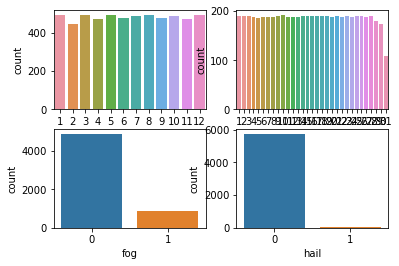

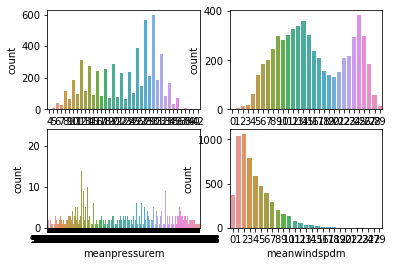

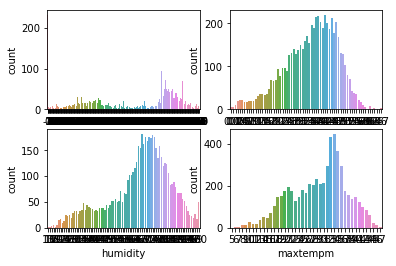

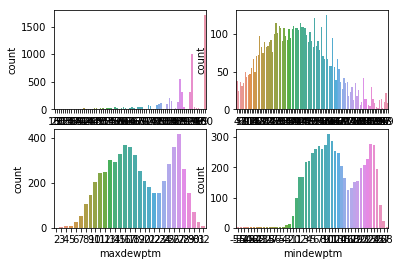

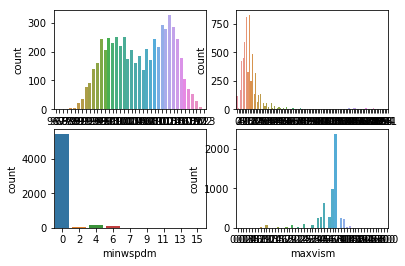

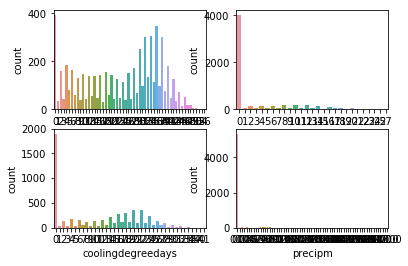

In [9]:
#individual feature visulization
k=0
while(k<30):
    for i in range(0, 4):
        plt.subplot(220 + 1 + i)
        sns.countplot(x=columns[k], data=data)
        k=k+1
    plt.show()
    k=k+1

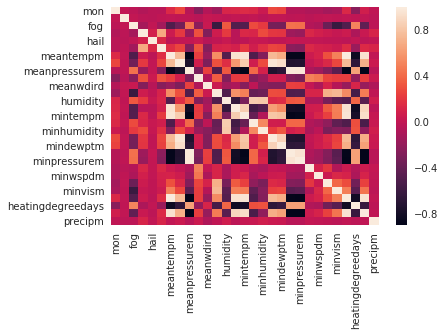

In [10]:
#plotting the heatmap for correlation
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.heatmap(data.corr())
plt.show()

In [11]:
#handling categorical data(meanwinddirection)
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
lableencoder_X = LabelEncoder()
X[: , 9]= lableencoder_X.fit_transform(X[: ,9])
onehotencoder = OneHotEncoder(categorical_features=[9])
X= onehotencoder.fit_transform(X).toarray()

In [12]:

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

/home/tanya/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Model training

In [13]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(y_train)

#fitting traning set to logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
#predicting the test set
y_pred = classifier.predict(X_test)

# Results on training 2001 - 2016

In [15]:
print(y_pred[:10])

[0 0 0 0 0 0 1 0 0 0]


In [16]:
#probablity estimation w.r.t yes/no
probability = classifier.predict_proba(X_test)

In [17]:
print(probability[:10])

[[ 0.99239045  0.00760955]
 [ 0.97235013  0.02764987]
 [ 0.9948866   0.0051134 ]
 [ 0.97587267  0.02412733]
 [ 0.98613572  0.01386428]
 [ 0.97245758  0.02754242]
 [ 0.38663728  0.61336272]
 [ 0.94287959  0.05712041]
 [ 0.98913359  0.01086641]
 [ 0.98794804  0.01205196]]


In [18]:
#evaluating the result via confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [19]:
cm


array([[943,  28],
       [ 60, 124]])

In [20]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


# Results for 2017

In [21]:
#tesing on 2017 
data2017 = pd.read_csv("daily_summary_data_2017.csv")

In [22]:
#keeping only metric system data and removing imperial system
data2017= data2017.drop(['snowfalli','snowdepthi','meantempi'
                  ,'meandewpti','meanpressurei','meanwindspdi','meanvisi','maxtempi'
                  ,'mintempi','maxdewpti','mindewpti','maxpressurei','minpressurei'
                  ,'maxwspdi','minwspdi','maxvisi','minvisi','precipi','precipsource'],axis=1)

#removing useless column 
data2017 = data2017.drop(['year','snow','tornado','snowfallm','snowdepthm'],axis=1)

In [23]:
#spiltting data into traning and testing dataset
X2017=data2017.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
               ,22,23,24,25,26,27,28]].values
y2017=data2017.iloc[:,3].values

In [24]:
X2017[: , 9]= lableencoder_X.transform(X2017[: ,9])
X2017= onehotencoder.transform(X2017).toarray()

X2017 =sc_X.transform(X2017)

In [33]:
y_pred2017=classifier.predict(X2017)
print(y_pred2017[:15])

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]


In [35]:
probability2017 = classifier.predict_proba(X2017)
print(probability2017[:10])

[[ 0.88149037  0.11850963]
 [ 0.89015467  0.10984533]
 [ 0.87886396  0.12113604]
 [ 0.71973889  0.28026111]
 [ 0.86407763  0.13592237]
 [ 0.60091132  0.39908868]
 [ 0.17770689  0.82229311]
 [ 0.57966442  0.42033558]
 [ 0.90532676  0.09467324]
 [ 0.97936584  0.02063416]]


In [28]:
cm2017 = confusion_matrix(y2017,y_pred2017)
print(cm2017)

[[286  20]
 [  6  52]]


In [30]:
print('Accuracy of logistic regression classifier on test set 2017: {:.2f}'.format(classifier.score(X2017, y2017)))


Accuracy of logistic regression classifier on test set 2017: 0.93
